（課題１）曽呂利新左衛門問題

【問題1】100日目の米粒の数
100日目には合計で米粒をいくつもらっているのかを計算するコードを作成し、答えを出力してください。また、1日目から100日目までの「その日にもらう米の数」と「その日までに累計で貰う米の数」の推移を折れ線グラフで表現してください。（縦軸が米の数、横軸が日数）


100日目までにもらっている米粒は合計:1.27e+30粒


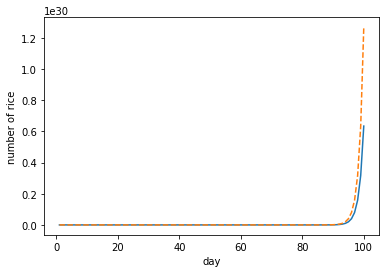

In [98]:
"""
１００日目までにもらっている米粒の量の累積数
および増加の推移
"""

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


rice_sin = [] # 当日のお米
rice_cum = [] # 累積のお米
days = 100
total = 0


for i in range(days):
    rice = 1 * 2 ** i
    total += rice
    rice_sin.append(rice)
    rice_cum.append(total)

print("100日目までにもらっている米粒は合計:{:.2e}粒".format(rice_cum[-1]))    


plt.plot(np.arange(1, 101), rice_sin)
plt.plot(np.arange(1, 101), rice_cum, linestyle='--')
plt.xlabel("day")
plt.ylabel("number of rice")
plt.show()

【問題2】100日目以外の米粒の数
この逸話は30日だったり81日だったりと日数が曖昧です。どの話にも対応できるように日数を引数とした 関数 を作成しましょう。関数を作成した上で、コースを受講する日数の間でいくつ米粒をもらえるかを答えてください。前の問題同様に折れ線グラフも出力してください。


コースの受講が終了する112日目までにもらっている米粒は合計:5.19e+33粒


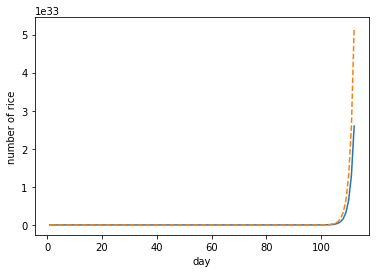

In [96]:
"""
問１を関数化する
コースの受講期間は１月９日〜４月３０日までとし、合計１１２日間とする。
"""

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def count_rice(days=None):
    """任意の日にちの間にもえらえる米粒の量を計算する関数
    
    パラメーター
    ーーーーーーーーー
    rice : int
        その日にもらえる米粒の計算結果
        
    total : int
        累積の米粒を計算するために用いる
        
    
    戻り値
    ーーーーーーーーー
    rice_sin：リスト
        その日にもらえる米粒
    
    rice_cum：リスト
        もらえる米粒の累積数
    """
    
    rice_sin = []
    rice_cum = [] 
    total = 0

    for i in range(days):
        rice = 1 * 2 ** i
        total += rice
        rice_sin.append(rice)
        rice_cum.append(total)

    return rice_sin, rice_cum


days = 112

rice_sin, rice_cum = count_rice(days)
print("コースの受講が終了する{}日目までにもらっている"
        "米粒は合計:{:.2e}粒".format(days, rice_cum[-1]))    
plt.plot(np.arange(1, days+1), rice_sin)
plt.plot(np.arange(1, days+1), rice_cum, linestyle='--')
plt.xlabel("day")
plt.ylabel("number of rice")
plt.show()

【問題3】何人が何日生活できる米か
この米があれば何人が何日生活できるか計算する関数を作成してください。コースを受講する期間に貰える米粒で、このクラスにいる人数であれば、何日間生活できるかを出力してみましょう。

関数の最低限の入力は 米粒の数(int) と 人数(int) 、出力は 生活できる日数(int) です。関数名やコメントなどは分かりやすく考えて作成してください。

ここでは1日に必要な米粒の数は提示しません。自分なりに調べて、計算式に落とし込んでください。どう調べ、何を根拠にしたかもコメントを残しておいてください。


In [34]:
"""
<考え方>
ご飯１杯１５０gのカロリー２５２kcal
ご飯１杯１５０gに相当する米の粒量３２５０粒
成人男性１人あたり１日に2200kcal必要と仮定し
１日あたりの１人の米粒の摂取量は：3250*2200/252（※１）
コース受講生＋メンター＝１４人とし
１日あたりに必要な米の量は：※１＊１４
"""


#問２のrice_cumを使用し
number_of_rice = rice_cum[-1]

#前提条件（考え方）を変数に格納
kcal_per_cup = 252
count_rice_per_cup = 3250
kcal_per_man = 2200
count_men = 14 #受講生＋メンター


#１日あたりの１人の米粒の摂取量(100粒単位に四捨五入)
number_of_rice_per_dayman = round(count_rice_per_cup * kcal_per_man / kcal_per_cup, -2)
#１日あたりのコース受講生の米粒の摂取量
number_of_rice_per_day = number_of_rice_per_dayman * count_men

397600.0


In [42]:
print("コースを受講する期間に貰える米粒でコース受講生{}人は約({:.2e})"
        "日間生活できる。".format(count_men, number_of_rice / number_of_rice_per_day))

コースを受講する期間に貰える米粒でコース受講生14人は約(1.31e+28)日間生活できる。


（課題２）何回折ったら富士山を超えるか問題


【問題1】富士山を超える最小の折る回数
厚さが「富士山(3776m)」を超えるのは何回紙を折った時か計算するプログラムを作成してください。

In [48]:
mt_fuji = 3776
Thickness = 0.00008
thickness = Thickness
n_folded = 0

#何回折れば厚さが富士山を超えるかを計算
while mt_fuji > thickness: 
    thickness = thickness * 2
    n_folded += 1

print(n_folded)

26


【問題2】任意の厚さに対応した関数を作成
距離を入力すると、何回折った時に超えるかを出力する関数を作成してください。引数として、折る前の厚さ t0
 も設定できるようにしましょう。
この関数を利用して、「最も近い太陽以外の恒星」に到達するには紙を何回折る必要があるか計算してください。「最も近い太陽以外の恒星」の距離は調査してください。

In [49]:
def fold_paper(thickness=0.00008, distance=None):
    """
    与えられた距離を超える折りたたみの回数を算出
    
    パラメーター
    ーーーーーーーーーー
    thickness : float
        紙の厚さ
    
    distance : int or float
        目標までの距離
    
    戻り値
    ーーーーーーーーーー
    n_folded : int
        折った回数        
    
    """
    n_folded = 0
    while  distance > thickness : 
        thickness = thickness * 2
        n_folded += 1    
    return n_folded

In [102]:
#最も近い太陽以外の恒星」に到達するには紙を何回折る必要があるか
fixed_star_dis = 4.243 * 9.46 * 10**15 
print(fold_paper(distance=fixed_star_dis), "回", sep='')

69回


【問題3】必要な紙の長さ
実際のところ身近にある紙は43回はおろか10回も折れません。しかし、大きな紙ほどたくさん折ることができ、トイレットペーパーのような長い紙を一方向に折ることを考えた時の折れる回数を求める公式が存在します。
公式を利用して、実際に紙を折り任意の厚さに到達するために必要な紙の長さを求める関数を作成してください。
そしてこれを使って「月」「富士山」「最も近い太陽以外の恒星」に届くために必要な紙の長さを求めてください。

In [51]:
import numpy as np
def paper_length(thickness=0.00008, n_folded=None):
    """
    紙を折り任意の厚さに到達するために必要な紙の長さを求める関数
    
    パラメーター
    ーーーーーーーーーー
    n_folded : int
        折る回数
    
    戻り値 
    ーーーーーーーーーー
    length : float
        指定回数折るためん必要な紙の長さ
    """
    
    length = (np.pi * thickness / 6) * (2**n_folded + 4) * (2**n_folded -1)
    return length

In [60]:
i = 49
print("{}回折る際に必要な紙の長さは{:.2e}メートル".format(i, paper_length(n_folded=i)))

49回折る際に必要な紙の長さは1.33e+25メートル


In [62]:
mt_fuji = 3776
fuji_folded = fold_paper(distance=mt_fuji) #富士山
print("折った紙の厚さが『富士山』に達するためには、紙の長さは{:.2e}"
        "メートル必要".format(paper_length(n_folded=fuji_folded)))

fixed_star_dis = 4.243 * 9.46 * 10**15 
fixed_star_folded = fold_paper(distance=fixed_star_dis) #恒星
print("折った紙の厚さが『最も近い太陽以外の恒星』に達するためには、紙の長さは{:.2e}"
        "メートル必要".format(paper_length(n_folded=fixed_star_folded)))

moon = 384400000
moon_folded = fold_paper(distance=moon) #月
print("折った紙の厚さが『月』に達するためには、紙の長さは{:.2e}"
        "メートル必要".format(paper_length(n_folded=moon_folded)))

折った紙の厚さが『富士山』に達するためには、紙の長さは1.89e+11メートル必要
折った紙の厚さが『最も近い太陽以外の恒星』に達するためには、紙の長さは1.46e+37メートル必要
折った紙の厚さが『月』に達するためには、紙の長さは3.24e+21メートル必要


（課題３）栗まんじゅう問題

1個の栗まんじゅうにバイバインを振りかけた場合、太陽系が栗まんじゅうで覆われるのは何分後でしょうか。これを計算するプログラムを作成してください。

栗まんじゅうや太陽系の体積を調査した上で仮定して計算してください。栗まんじゅうの隙間や重力などは考えず、問題を単純化して構いません。

ボールにバイバインを振りかけた時、東京ドームが一杯になる時間など他の状況にも適用できるような汎用的なプログラムを作成してください。また、グラフを表示するなど分かりやすいノートブックを作成してください。

太陽系が栗まんじゅうで覆われるのは710分後


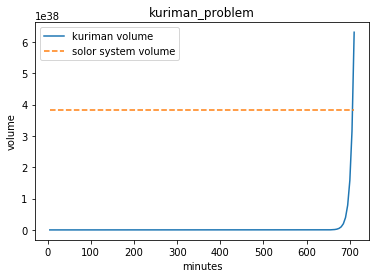

In [89]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def check_vol_kuriman(origin_vol, target_vol):
    """
    1個の栗まんじゅうにバイバインを振りかけた場合、太陽系が栗まんじゅうで
    覆われるのは何分後を計算する関数
    
    パラメーター
    ーーーーーーーーーー
    origin_vol : float
        増加する対象物の体積
    target_vol : float
        ターゲットの体積
    
    戻り値
    ーーーーーーーーーー
    minutes : int
        増加する対象物の体積がターゲットの体積を超える時間
    
    kuriman_list : リスト
        origin_volの増加推移
    """
    
    suii_list = [ ] 
    minutes = 0
    for i in range(1000):
        origin_vol = origin_vol * 2
        suii_list.append(origin_vol)
        minutes += 5
        if origin_vol > target_vol:
            return minutes, suii_list
            break

#栗饅頭および太陽系をどちらも球と仮定して算出する。
kuriman_vol = 4/3* math.pi * (0.03)**3
solor_system_vol = 4/3* math.pi * (149597870700*30.1)**3

minutes, kuriman_suii_list = check_vol_kuriman(kuriman_vol, solor_system_vol)

print("太陽系が栗まんじゅうで覆われるのは{}分後".format(minutes))

# グラフを作成
plt.plot(np.arange(5, minutes+5, 5), kuriman_suii_list, label='kuriman volume') 
plt.plot(np.arange(5, minutes+5, 5), [solor_system_vol for i in range(len(kuriman_suii_list))], 
            linestyle='--', label='solor system volume')
plt.title("kuriman_problem")
plt.xlabel("minutes")
plt.ylabel("volume")
plt.legend(loc='upper left')
plt.show()